# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [18]:
data = pd.read_csv('weight-height.csv')
data.set_index('Gender', inplace = True)
male_df =  data.loc['Male']
female_df =  data.loc['Female']

male_df.describe()
female_df.describe()
# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007



,Height,Weight
count,5000.000000,5000.000000
mean,63.708774,135.860093
std,2.696284,19.022468
min,54.263133,64.700127
25%,61.894441,122.934096
50%,63.730924,136.117583
75%,65.563565,148.810926
max,73.389586,202.237214


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

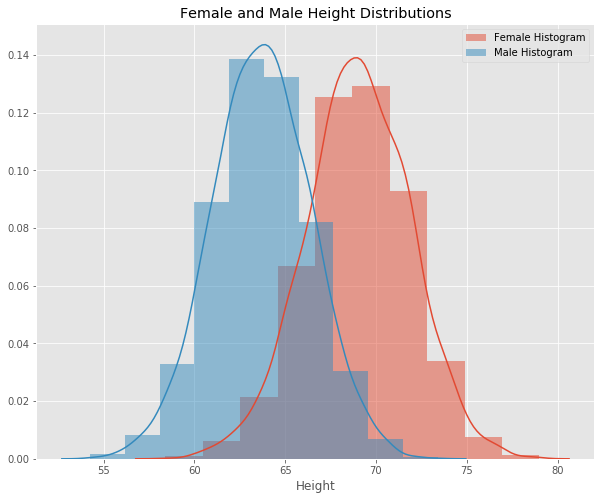

In [41]:
# Your code here
import seaborn as sns
fig, (ax1)= plt.subplots(1, sharex=True, figsize = (10,8))

sns.distplot(male_df['Height'], bins = 10, hist = True, hist_kws= {
                                                                    "alpha" : 0.5,
                                                                    "label" :'Female Histogram'
})

sns.distplot(female_df['Height'], bins = 10, hist = True, hist_kws = { "alpha": 0.5,
                                                                        "label": 'Male Histogram'})
plt.title("Female and Male Height Distributions")
plt.legend()

(array([  10.,   64.,  221.,  687., 1290., 1332.,  956.,  349.,   79.,
          12.]),
 array([58.40690493, 60.46608867, 62.52527241, 64.58445616, 66.6436399 ,
        68.70282364, 70.76200738, 72.82119112, 74.88037486, 76.9395586 ,
        78.99874235]),
 <a list of 10 Patch objects>)

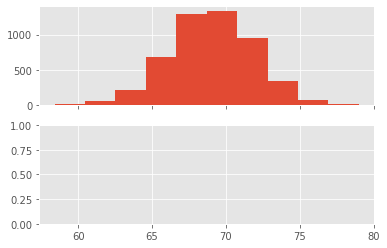

In [19]:
fig, (ax1,ax2)= plt.subplots(2, sharex=True)

ax1.hist(male_df['Height'], )

# Record your observations - are these inline with your personal observations?
On average I do see that men are taller than women. It does fall inline my person observations.

## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

In [74]:
def density(x):
    n, bins = np.histogram(x, 10, density = 1)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]
    return pdfx,pdfy


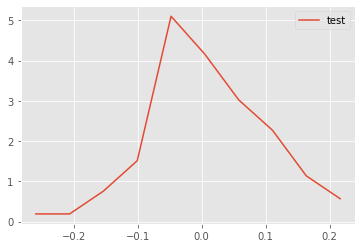

In [75]:
#def density(x):
    
 #   pass


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add overlapping density plots to the histograms plotted earlier

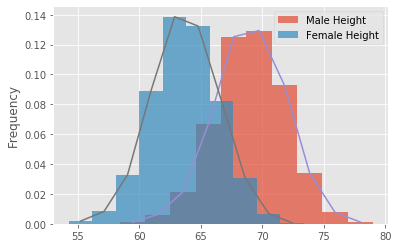

In [81]:
# Your code here 

male_df['Height'].plot.hist(bins = 10, density= True, alpha = 0.7, label = "Male Height");
female_df['Height'].plot.hist(bins = 10, density = True, alpha = 0.7, label="Female Height");
plt.legend()
x,y = density(male_df.Height)
plt.plot(x,y)
x2,y2 = density(female_df.Height)
plt.plot(x2,y2)
plt.show();

## Repeat the above exercise for male and female weights

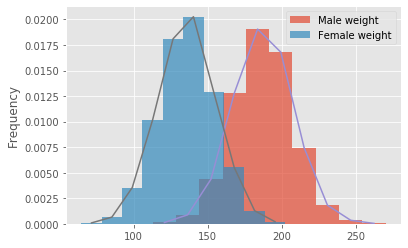

In [83]:
# Your code here 

male_df['Weight'].plot.hist(bins = 10, density = True, alpha = 0.7, label = 'Male weight')
female_df['Weight'].plot.hist(bins = 10, density = True, alpha = 0.7, label = 'Female weight')
plt.legend()
x,y = density(male_df['Weight'])
plt.plot(x,y)
x,y = density(female_df['Weight'])
plt.plot(x,y)
plt.show()

## Write your observations in the cell below

In [25]:
# Record your observations - are these inline with your personal observations?


# What is the takeaway when comparing male and female heights and weights?

## Repeat the above experiments in seaborn and compare with your results

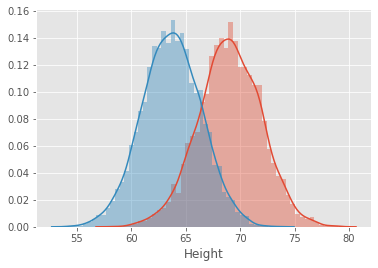

In [85]:
# Code for heights here
import seaborn as sns

sns.distplot(male_df['Height'])
sns.distplot(female_df['Height'])

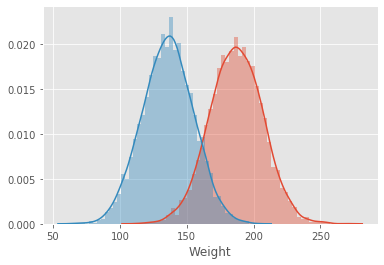

In [87]:
# Code for weights here

sns.distplot(male_df['Weight'])
sns.distplot(female_df['Weight'])

In [11]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.